# Project assignemtn A 
## start up - descriptive analysis
### Mainly using coding from week 3 

First we load all the packages we think that we need: 

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
import datetime as dt
import warnings
from random import sample 
warnings.filterwarnings('ignore')

import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Loading the two dataset and getting an overview

In [2]:
df = pd.read_csv("covid_de.csv")
df_demo = pd.read_csv("demographics_de.csv")
df_des = pd.read_excel("location.xlsx")
#drop NaN and change to datetime
df = df.dropna()
df['date'] = pd.to_datetime(df.date)

In [3]:

df.date = pd.to_datetime(df["date"], format="%Y-%m-%dT%H:%M:%S.%fZ")
df = df.sort_values(by='date')

In [4]:
df1 = df.sort_values(by='date')
df1 = df1[['date','cases','deaths','recovered']]
df1['Total Cases'] = df1['cases'].cumsum()
df1['Total Deaths'] = df1['deaths'].cumsum()
df1['Total Recovered'] = df1['recovered'].cumsum()
df1 = df1.drop(['cases','deaths','recovered'],axis=1)
df1 = df1.set_index('date')

And rearranging it to remova Nas etc 

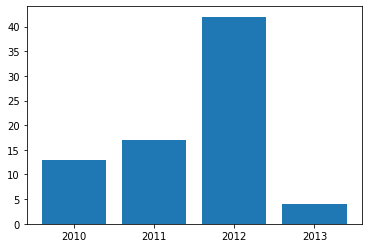

In [7]:
# This files creates a pyplot bar graph and shows a tooltip at the middle of a bar when it is hovered.
# Licenced under CC0 1.0 Universal Public Domain Dedication
# adapted from https://stackoverflow.com/a/47166787/5433628

import matplotlib.pyplot as plt

# input data
x = [2010, 2011, 2012, 2013]
y = [13, 17, 42, 4]

# create and define plot
fig, ax = plt.subplots()
graph = plt.bar(x, y)
plt.xticks(x)

# define the tooltip
annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(artist):
    """ update tooltip when hovering a given plotted objet """

    # in plt.bar, each artist is a Rectangle – see https://matplotlib.org/api/_as_gen/matplotlib.patches.Rectangle.html
    # find the middle of the bar
    center_x = artist.get_x() + artist.get_width() / 2
    center_y = artist.get_y() + artist.get_height() / 2
    annot.xy = (center_x, center_y)
    # get the height of the bar as text
    text = str(artist.get_height())
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.4)

def hover(event):
    """ update and show a tooltip while hovering an object; hide it otherwise """
    vis = annot.get_visible()
    if event.inaxes == ax:
        an_artist_is_hovered = False
        for artist in graph:
            contains, _ = artist.contains(event)
            if contains:
                an_artist_is_hovered = True
                update_annot(artist)
                annot.set_visible(True)
                fig.canvas.draw_idle()
        if not an_artist_is_hovered:
            # one wants to hide the annotation only if no artist in the graph is hovered
            annot.set_visible(False)
            fig.canvas.draw_idle()

# call 'hover' if there is a mouse motion
fig.canvas.mpl_connect("motion_notify_event", hover)

# time to see our work!
plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

data = np.outer(range(10), range(1, 5))
fig, ax = plt.subplots()
lines = ax.plot(data)
ax.set_title("Click somewhere on a line.\nRight-click to deselect.\n"
"Annotations can be dragged.")
mplcursors.cursor(hover=True) # or just mplcursors.cursor()
plt.show()

ModuleNotFoundError: No module named 'mplcursors'

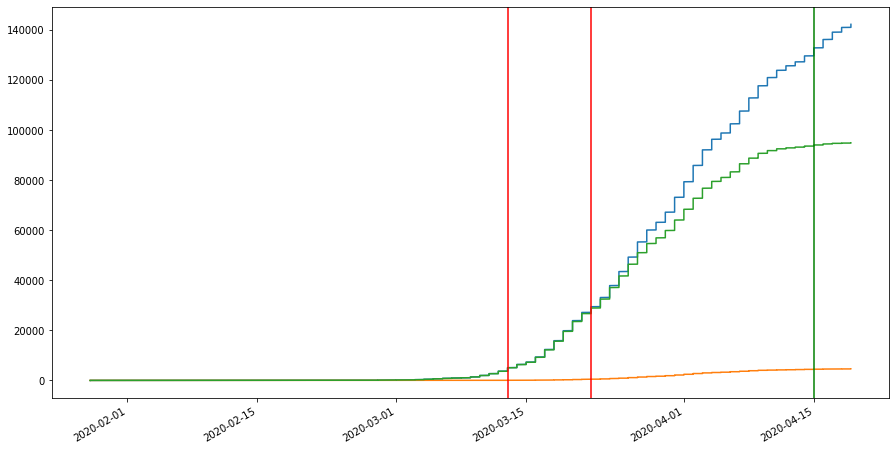

In [25]:
fig, ax = plt.subplots(figsize=(15, 8))

plt.plot(df1['Total Cases'])
plt.plot(df1['Total Deaths'])
plt.plot(df1['Total Recovered'])
plt.axvline(pd.Timestamp('2020-03-13'),color='r')
plt.axvline(pd.Timestamp('2020-03-22'),color='r')
plt.axvline(pd.Timestamp('2020-04-15'),color='g')
# beautify the x-labels
plt.gcf().autofmt_xdate()
mplcursors.cursor(hover=True)
plt.show()


# x coordinates for the lines



In [21]:
# from _future_ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


def niceplot(Value):
    
    if Value == 'Total':
        df1 = df.sort_values(by='date')
        df1 = df1[['date','cases','deaths','recovered']]
        df1['Total Cases'] = df1['cases'].cumsum()
        df1['Total Deaths'] = df1['deaths'].cumsum()
        df1['Total Recovered'] = df1['recovered'].cumsum()
        df1 = df1.drop(['cases','deaths','recovered'],axis=1)
        df1 = df1.set_index('date')
        df1.iplot(xTitle="Date",
                    yTitle="Occurrences", title="Corona Development in Gernmany by {}".format(Value))
    if Value == 'By day':
        df1 = df.sort_values(by='date')
        df1 = df1[['date','cases','deaths','recovered']]
        df1 = df1.set_index('date')
        df1.columns = ['Cases','Deaths','Recovered']
        df1.iplot(xTitle="Date",
                    yTitle="Occurrences", title="Corona Development in Germany by {}".format(Value), kind='bar')


interact(niceplot,Value = ['Total','By day']);

interactive(children=(Dropdown(description='Value', options=('Total', 'By day'), value='Total'), Output()), _d…

In [5]:
#Changing gender in demografic to have same values as covid data set. 
df_demo['gender'] = df_demo['gender'].map({'female': 'F','male':'M'})

In [6]:
#Merging the two dataset on state, age_group and gender. 
merged = pd.merge(df_covid,df_demo,how='inner', on=["state","age_group","gender"])
#And merging latitude and longtitude on the full dataset
fulldata = pd.merge(merged,df_des,how='inner',on=['county'])

Now we want to describe the data. We make a statistic overview: First of all the nummeric values and after of all the categorical values:

In [7]:
df.to_excel(r'C:\Users\katja\Documents\DTU\8. semester\Social Data analysis and visualization\projekt\samletdata.xlsx', index = False)


In [8]:
df_covid.describe()

,cases,deaths,recovered,casess,deathss
count,47556.000000,47556.000000,47556.000000,47556.000000,47556.000000
mean,2.604214,0.062095,1.427496,65752.951510,1665.763689
std,3.147021,0.291816,2.121080,36262.308798,846.762866
min,0.000000,0.000000,-1.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,33974.750000,949.000000
50%,2.000000,0.000000,1.000000,68939.500000,1748.000000
75%,3.000000,0.000000,2.000000,97734.750000,2422.000000
max,69.000000,8.000000,41.000000,123846.000000,2953.000000


In [9]:
df_covid.describe(include='object')

,state,county,age_group,gender
count,47556,47556,47556,47556
unique,16,413,6,2
top,Bayern,SK Muenchen,35-59,M
freq,12313,365,16195,23941


# Jitterplot



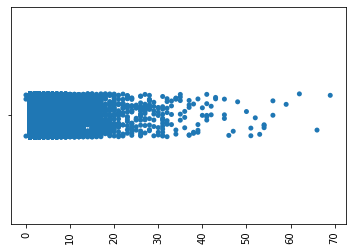

In [10]:

#Jitterplot of number of cases, hence x is cases 
x = df_covid['cases']

#Så plottes jitterplottet: 
sns.stripplot(sorted(x), jitter=True)
plt.xticks(rotation='90')
# wea.Time
plt.show()


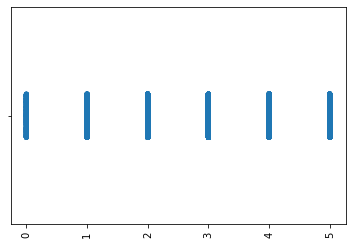

In [11]:

#Jitterplot of number age groups. Before this can heppen, a convertion of the groups into numbers is needed. 
#I dont think a jitterplot is cool here.. 
#But maybe we can use the code for samething later... 

df_covid.age_group = pd.Categorical(df_covid.age_group)
df_covid['code'] = df_covid.age_group.cat.codes

x = df_covid['code']

#Så plottes jitterplottet: 
sns.stripplot(sorted(x), jitter=True)
plt.xticks(rotation='90')
# wea.Time
plt.show()


# Now its time for a histogram plot 

We need to categorize the different age groups since those are the ones we want to plot on top of each other

In [12]:
#Categorize the histograms that we want. 
df_1 = df_covid[df_covid['age_group'].str.contains("00-04")] 
df_2 = df_covid[df_covid['age_group'].str.contains("05-14")]
df_3 = df_covid[df_covid['age_group'].str.contains("15-34")]
df_4 = df_covid[df_covid['age_group'].str.contains("35-59")]
df_5 = df_covid[df_covid['age_group'].str.contains("60-79")]
df_6 = df_covid[df_covid['age_group'].str.contains("80-99")]

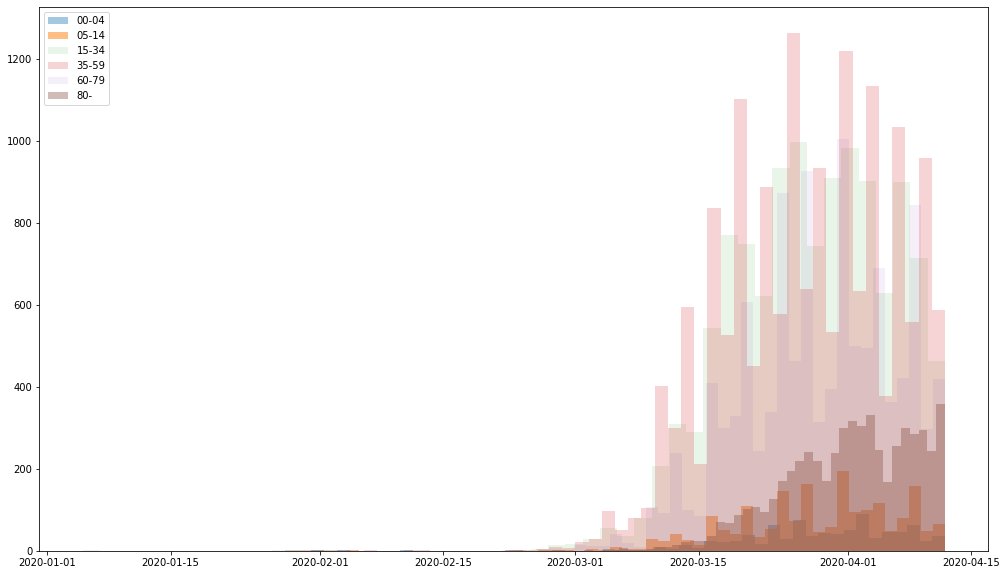

In [13]:
from matplotlib import pyplot

#And now I plot the histograms on top of each other. Alpha is the see through of the color. 
plt.figure(figsize=(17, 10)) # Set the size of the figure 
plt.hist(df_1.date, bins=50,alpha=0.4, label='00-04')
pyplot.hist(df_2.date, bins=50, alpha=0.5, label='05-14')
plt.hist(df_3.date, bins=50, alpha=0.1, label='15-34')
plt.hist(df_4.date, bins=50, alpha=0.2, label='35-59')
plt.hist(df_5.date, bins=50, alpha=0.1, label='60-79')
plt.hist(df_6.date, bins=50, alpha=0.4, label='80-')
pyplot.legend(loc='upper left')
pyplot.show()

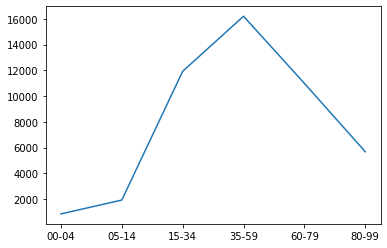

In [14]:
from matplotlib import pyplot

# We start by making a curve: 

# df_covid['age_group'].count()
y=df_covid.groupby('age_group').count()
plt.plot(y.code)


# Location
## First a histogram without relative to population

Text(0, 0.5, 'Frequency')

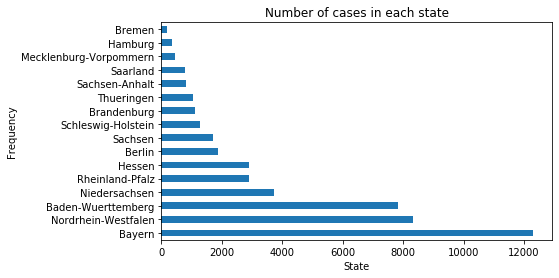

In [15]:
#We set the state as x axis and count the number of rows for each state. 
ax = df['state'].value_counts().plot(kind='barh',
                                    figsize=(7,4),
                                    title="Number of cases in each state")
ax.set_xlabel("State")
ax.set_ylabel("Frequency")

# Location 
## Now inclusive population 
This means that we have to use the merged dataset to be able to see how many people in the specific area.
We have to make a new dataset of our df_covid because we want a groupby dataset by state, gender and age. Then we can merge this with the demografic datset. 

In [26]:
# We start by grouping the merged dataset on state, age and gender and the aggregate the number of cases by its size.
df1 = merged.groupby(['state','age_group','gender']).agg({'cases':'size'})
#The merged groupby data has to be a dataframe to continue: 
df2= pd.DataFrame(df1)


cases
state              age_group gender       
Baden-Wuerttemberg 00-04     F          73
                             M          73
                   05-14     F         161
                             M         181
                   15-34     F         990
...                                    ...
Thueringen         35-59     M         208
                   60-79     F         115
                             M         127
                   80-99     F          49
                             M          53

[192 rows x 1 columns]

In [17]:
#Now merging the two new dataset on state, age_group and gender. 
merged2 = pd.merge(df2,df_demo,how='inner', on=["state","age_group","gender"])

In [18]:
#Now a new column can be added, called relative-cases. Here the number of cases is divided with the population. 
#This has to be multiplied with 100.000 since you meassure it by 100.000 inbyggere to compare cases. 
merged2['relative_cases_by_100.000'] = merged2['cases'].div(merged2['population'])*100000

In [19]:
#Now the merged2 dataset is grouped by state, and the relative_cases are now only on state and no longer on age and gender. 
relative=merged2.groupby('state',as_index=False).sum().sort_values(by='relative_cases_by_100.000',ascending=False)
relative=pd.DataFrame(relative)
relative

,state,cases,population,relative_cases_by_100.000
1,Bayern,12313,13076721,1194.508245
0,Baden-Wuerttemberg,7842,11069533,900.880314
11,Saarland,780,990509,891.915390
10,Rheinland-Pfalz,2896,4084844,736.821317
2,Berlin,1870,3644826,608.641651
9,Nordrhein-Westfalen,8310,17932651,559.933197
15,Thueringen,1041,2143145,510.864821
8,Niedersachsen,3713,7982448,510.481757
6,Hessen,2886,6265809,509.585881
14,Schleswig-Holstein,1277,2896712,467.174933


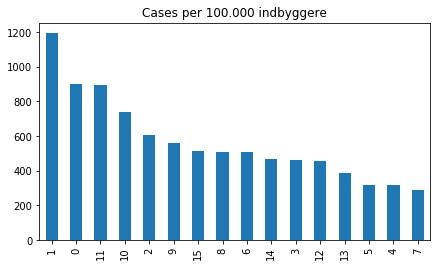

In [20]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
# axes[0].plot(ax)
# axes[1].plot(ax2)
# fig.tight_layout()

#Finaly it is possible to plot the relative cases on a histogram
ax2 = relative['relative_cases_by_100.000'].plot(kind='bar',
                                    figsize=(7,4),
                                    title="Cases per 100.000 indbyggere")
ax.set_xlabel("State")
ax.set_ylabel("Frequency")

plt.show()

As we see on the histogram, there are difference betwween the relative cases and the number of cases in each state. This is due to the fact that there are a higher population density in some areas, which makes it more likely to be sick. 

In [ ]:
state=pd.Series(data_focuscrime.Category).value_counts()
crime.plot('bar',color='b')

In [23]:
from sklearn import preprocessing
import numpy as np
#First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. 
#Let's call it P(crime). IT is the same as calculating the norm of the data. 
#We make a function 
def norm(state):
    return ((state)-min(state))/(max(state)-min(state))

# P_crime=preprocessing.scale(crime)


# pd.Series([crime_district]).array
# norm_crime= preprocessing.scale(crime_district[0])
# crime_district.array

In [25]:
pr_crime=norm(state)

NameError: name 'state' is not defined